# Assignment 2: recommender System

## Code from the lecture

In [1]:
#read data to DataFrames
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('../../DATA/movielens100k/u.user', sep='|', names=u_cols, encoding = "ISO-8859-1")

r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('../../DATA/movielens100k/u.data', sep='\t', names=r_cols, encoding = "ISO-8859-1")

m_cols=['movie_id', 'title', 'release date', 'video release date', 'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
movies = pd.read_csv('../../DATA/movielens100k/u.item', sep='|', names=m_cols ,encoding = "ISO-8859-1" )

In [2]:
#gerate matrix (this can be done more efficiently!)
R=np.zeros((np.shape(users)[0],np.shape(movies)[0]))
for i in range(np.shape(ratings)[0]):
    R[ratings['user_id'][i]-1, ratings['movie_id'][i]-1]=ratings['rating'][i]

In [3]:
def CosineDist(a,b):
    return a.dot(b)/(np.linalg.norm(a)*np.linalg.norm(b))

In [4]:
#again, implementation not efficient: better use lamda opperators 
D=np.zeros((np.shape(movies)[0],np.shape(movies)[0]))
for i in range(0,np.shape(movies)[0]):
    for j in range(0,np.shape(movies)[0]):
        if i!=j:
            D[i,j]=CosineDist(R[:,i],R[:,j])

In [5]:
def getTopN(movie_id,N=5):
    return D[movie_id,:].argsort()[-N:]

def getIDbyName(name):
    if np.size(movies.movie_id[movies.title.str.contains(name)]) > 0:
        m = int(movies.movie_id[movies.title.str.contains(name)][:1]), str(movies.title[movies.title.str.contains(name)][:1])
        return m[0]-1
    else:
        return -1
    
def getNameByID(IDs):
    res=movies.iloc[IDs]
    return res.title

def CII(title):
    if getIDbyName(title) > 0:
        print ("recommending movies for: '" + str(getNameByID(getIDbyName(title)))+"'")
        return getNameByID(getTopN(getIDbyName(title)))[::-1]
    else:
        print ("no movie title containing " + str(title) + "found...")
        
def Score_byID(ID, D, Test):
    #print ("Hit Scores for: ", getNameByID(ID))
    res_id = getTopN(ID,D)[::-1]
    res_title = getNameByID(getTopN(ID,D))[::-1]
    res_score = Test[res_id]
    return res_id, res_title, res_score, np.mean(res_score)
    
#compute scores for all test users
def test_Score(D_train, R_test):
    userScores=[]
    for i in range(R_test.shape[0]):
        userScore=0
        userTop = np.argsort(R_test[i])[-5:]
        for e in userTop:
            res_id, res_title, res_score, av_score = Score_byID(e,D_train, R_test[i])
            userScore+=av_score
        userScores.append(userScore/(5))
    return userScores

## 4.1 Alternative Distance Measures
Implement a different distance measure, e.g. eucledian and compare the ressults.

## 4.2 Baseline Results
Implement and compare results of
* random recommendations
* allways recommending the top 5 movies (over all users)

## 4.3 SVD
Implement the SVD approach. Hints: 
* use numpy.linalg.svd()
* apply SVD on $D$
* plot the singular values and decide where to cut off the reconstruction
* reconstruct and evaluate $D'$


Aufgabe 4.1


In [23]:
#Eucledian Distance

def EucledianDist(a,b):
    return np.linalg.norm(b-a)

def CII_EUC(title):
    if getIDbyName(title) > 0:
        print ("recommending movies for: '" + str(getNameByID(getIDbyName(title)))+"'")
        return getNameByID(getTopN_EUC(getIDbyName(title)))[::-1]
    else:
        print ("no movie title containing " + str(title) + "found...")

def getTopN_EUC(movie_id,N=5):
    return Deuc[movie_id,:].argsort()[-N:]

In [24]:
CII_EUC("Star")

recommending movies for: 'Star Wars (1977)'


989              Anna Karenina (1997)
1061    Four Days in September (1997)
1126          Truman Show, The (1998)
937        Smile Like Yours, A (1997)
1242               Night Flier (1997)
Name: title, dtype: object

In [27]:
CII("Star")

recommending movies for: 'Star Wars (1977)'


989              Anna Karenina (1997)
1061    Four Days in September (1997)
1126          Truman Show, The (1998)
937        Smile Like Yours, A (1997)
1242               Night Flier (1997)
Name: title, dtype: object

In [15]:
#again, implementation not efficient: better use lamda opperators 
Deuc=np.zeros((np.shape(movies)[0],np.shape(movies)[0]))
for i in range(0,np.shape(movies)[0]):
    for j in range(0,np.shape(movies)[0]):
        if i!=j:
            Deuc[i,j]=EucledianDist(R[:,i],R[:,j])

In [22]:
#CII("Star",Deuc)

#test = test_Score(Deuc,R)
from sklearn.model_selection import train_test_split
R_train, R_test = train_test_split(R, test_size=0.1)

D_train=np.zeros((np.shape(movies)[0],np.shape(movies)[0]))
for i in range(0,np.shape(movies)[0]):
    for j in range(0,np.shape(movies)[0]):
        if i!=j:
            D_train[i,j]=EucledianDist(R_train[:,i],R_train[:,j])

In [30]:
def Score_byID_EUC(ID, D, Test):
    #print ("Hit Scores for: ", getNameByID(ID))
    res_id = getTopN_EUC(ID,D)[::-1]
    res_title = getNameByID(getTopN(ID,D))[::-1]
    res_score = Test[res_id]
    return res_id, res_title, res_score, np.mean(res_score)
    
#compute scores for all test users
def test_Score(D_train, R_test):
    userScores=[]
    for i in range(R_test.shape[0]):
        userScore=0
        userTop = np.argsort(R_test[i])[-5:]
        for e in userTop:
            res_id, res_title, res_score, av_score = Score_byID_EUC(e,D_train, R_test[i])
            userScore+=av_score
        userScores.append(userScore/(5))
    return userScores

In [31]:
test_res=test_Score(D_train,R_test)

TypeError: only integer scalar arrays can be converted to a scalar index

Aufgabe 4.2

In [28]:
#Code

Aufgabe 4.3

In [42]:
#Sigulärwertzwerlegung

#D anzeigen
D

array([[ 0.        , 77.72387021, 80.07496488, ..., 84.79976415,
        84.68766144, 84.68766144],
       [77.72387021,  0.        , 42.17819342, ..., 38.36665219,
        38.19685851, 38.19685851],
       [80.07496488, 42.17819342,  0.        , ..., 31.0322413 ,
        31.11269837, 30.82207001],
       ...,
       [84.79976415, 38.36665219, 31.0322413 , ...,  0.        ,
         3.60555128,  3.60555128],
       [84.68766144, 38.19685851, 31.11269837, ...,  3.60555128,
         0.        ,  4.24264069],
       [84.68766144, 38.19685851, 30.82207001, ...,  3.60555128,
         4.24264069,  0.        ]])

In [43]:
U,S,V = np.linalg.svd(D)

In [44]:
#U anzeigen
U

array([[-5.18571807e-02, -7.08005537e-02,  9.17715794e-02, ...,
        -6.99545749e-18,  2.42935607e-18, -2.52586915e-18],
       [-2.80479420e-02, -1.60941736e-02, -2.74306454e-02, ...,
        -1.30539158e-18,  4.33417293e-18, -1.15519596e-17],
       [-2.56118900e-02, -4.72224716e-03, -3.04574457e-02, ...,
         1.45122623e-18,  1.77640159e-17,  3.90081783e-19],
       ...,
       [-1.73336019e-02,  3.01606368e-02,  3.32026138e-02, ...,
         1.84146217e-16,  2.06503109e-17,  7.08780169e-17],
       [-1.74250099e-02,  2.95197984e-02,  2.94185345e-02, ...,
         2.18738190e-16, -1.67006855e-16,  1.24997488e-16],
       [-1.74271258e-02,  2.95063569e-02,  2.91379629e-02, ...,
        -2.71128783e-17,  2.21401874e-16, -2.43918876e-16]])

In [45]:
#S anzeigen
S

array([6.24444764e+04, 1.49757280e+04, 1.43608705e+03, ...,
       6.16462606e-15, 3.39643907e-15, 2.88355079e-15])

In [46]:
#V anzeigen
V

array([[-5.18571807e-02, -2.80479420e-02, -2.56118900e-02, ...,
        -1.73336019e-02, -1.74250099e-02, -1.74271258e-02],
       [ 7.08005537e-02,  1.60941736e-02,  4.72224716e-03, ...,
        -3.01606368e-02, -2.95197984e-02, -2.95063569e-02],
       [-9.17715794e-02,  2.74306454e-02,  3.04574457e-02, ...,
        -3.32026138e-02, -2.94185345e-02, -2.91379629e-02],
       ...,
       [ 0.00000000e+00,  5.84403068e-17, -5.06851176e-19, ...,
         2.61086746e-16, -3.21476615e-16,  1.36749154e-16],
       [ 0.00000000e+00,  3.05623402e-18, -1.23289772e-17, ...,
        -1.09935350e-16, -8.94200220e-17, -7.41408087e-17],
       [ 0.00000000e+00, -2.96764176e-18, -3.95388555e-18, ...,
        -5.73714754e-17, -6.97275597e-17, -2.62671795e-17]])

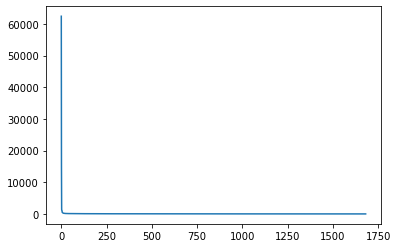

In [48]:
plt.plot(S)